# 付録A  補足

A-1 SymPyを使って数式をLaTeX形式に変換する例

In [ ]:
from sympy import *

x,y = symbols('x y')

z = x**2 / sqrt(2*y**3 - 1)

print(latex(z))

'\\frac{x^{2}}{\\sqrt{2 y^{3} - 1}}'

A-2 CodeCogsを使ってWEBブラウザに数式を表示する例

In [ ]:
import urllib
import webbrowser
from sympy import *

x,y = symbols('x y')

z = x**2 / sqrt(2*y**3 - 1)

# webbrowser.open("https://latex.codecogs.com/svg.image?" + urllib.parse.quote(latex(z)), new=2)
# Google ColaboratoryのNotebookで表示できるように表示方法を修正しています。
from IPython.display import IFrame
IFrame("https://latex.codecogs.com/svg.image?" + urllib.parse.quote(latex(z)), width=400, height=200)


A-3 ゼロから二項分布を実装する例

In [ ]:
# 階乗：ある整数から1までの連続する整数を順番に掛け合わせたもの
# 例: 5! = 5 * 4 * 3 * 2 * 1
def factorial(n: int):
    f = 1
    for i in range(n):
        f *= (i + 1)
    return f

# 二項分布に必要な係数を生成する
def binomial_coefficient(n: int, k: int):
    return factorial(n) / (factorial(k) * factorial(n - k))

# 試行回数nのうち成功確率pでk回成功する確率を二項分布で求める
def binomial_distribution(k: int, n: int, p: float):
    return binomial_coefficient(n, k) * (p ** k) * (1.0 - p) ** (n - k)

# 成功確率が90%の試行を10回行う
n = 10
p = 0.9

for k in range(n + 1):
    probability = binomial_distribution(k, n, p)
    print("{0} - {1}".format(k, probability))

0 - 9.999999999999978e-11
1 - 8.999999999999981e-09
2 - 3.644999999999994e-07
3 - 8.747999999999988e-06
4 - 0.00013778099999999982
5 - 0.0014880347999999984
6 - 0.01116026099999999
7 - 0.057395627999999976
8 - 0.19371024449999993
9 - 0.38742048900000003
10 - 0.3486784401000001


A-4 ゼロからベータ分布を実装する例

In [ ]:
# 階乗：ある整数から1までの連続する整数を順番に掛け合わせたもの
# 例: 5! = 5 * 4 * 3 * 2 * 1
def factorial(n: int):
    f = 1
    for i in range(n):
        f *= (i + 1)
    return f

def approximate_integral(a, b, n, f):
    delta_x = (b - a) / n
    total_sum = 0

    for i in range(1, n + 1):
        midpoint = 0.5 * (2 * a + delta_x * (2 * i - 1))
        total_sum += f(midpoint)

    return total_sum * delta_x

def beta_distribution(x: float, alpha: float, beta: float) -> float:
    if x < 0.0 or x > 1.0:
        raise ValueError("x must be between 0.0 and 1.0")

    numerator = x ** (alpha - 1.0) * (1.0 - x) ** (beta - 1.0)
    denominator = (1.0 * factorial(alpha - 1) * factorial(beta - 1)) / \
        (1.0 * factorial(alpha + beta - 1))

    return numerator / denominator


greater_than_90 = approximate_integral(a=0.90, b=1.0, n=1000,
    f=lambda x: beta_distribution(x, 8, 2))
less_than_90 = 1.0 - greater_than_90

print("GREATER THAN 90%: {}, LESS THAN 90%: {}".format(greater_than_90,
    less_than_90))

GREATER THAN 90%: 0.22515904881135335, LESS THAN 90%: 0.7748409511886467


A-5 Pythonでの正規分布関数の例

In [ ]:
import math


def normal_pdf(x: float, mean: float, std_dev: float) -> float:
    return (1.0 / (2.0 * math.pi * std_dev ** 2) ** 0.5) * \
      math.exp(-1.0 * ((x - mean) ** 2 / (2.0 * std_dev ** 2)))


def approximate_integral(a, b, n, f):
    delta_x = (b - a) / n
    total_sum = 0

    for i in range(1, n + 1):
        midpoint = 0.5 * (2 * a + delta_x * (2 * i - 1))
        total_sum += f(midpoint)

    return total_sum * delta_x


p_between_61_and_62 = approximate_integral(a=61, b=62, n=7,
  f= lambda x: normal_pdf(x,64.43,2.99))

print(p_between_61_and_62)

0.0825344984983386


A-6 Pythonで逆累積分布関数（ICDFや【`ppf()`】とも呼ぶ）を実装する例

In [ ]:
import math

def normal_cdf(x: float, mean: float, std_dev: float) -> float:
    return (1 + math.erf((x - mean) / math.sqrt(2) / std_dev)) / 2

mean = 64.43
std_dev = 2.99

x = normal_cdf(66, mean, std_dev) - normal_cdf(62, mean, std_dev)

print(x)

0.49204501470628936


A-7 ゴールデンレトリバーの体重をランダムに生成する例

In [ ]:
import random
from scipy.special import erfinv

def inv_normal_cdf(p: float, mean: float, std_dev: float):
    return mean + (std_dev * (2.0 ** 0.5) * erfinv((2.0 * p) - 1.0))

mean = 64.43
std_dev = 2.99

for i in range(0,1000):
    random_p = random.uniform(0.0, 1.0)
    print(inv_normal_cdf(random_p, mean, std_dev))


66.14183884017274
61.9726363435922
61.76811801407399
61.982183157062394
62.99039662375085
63.73377414468143
60.77505824090067
61.648573150260944
61.93136471283887
67.2470328485597
60.05601726591852
64.45724441969614
57.53177403796378
62.98309960886879
63.05432983708473
62.762481545593026
64.21323964814937
60.97114594059285
61.86547437647213
61.59670525059771
66.54543783010992
61.93867649225707
63.67947983398483
69.09993132785564
66.63595101110748
66.75029460967961
67.37620742985537
67.92706905405511
60.428555817057784
69.72141935746278
66.4526673434679
60.27122472487286
66.37821728854423
67.69918181616758
59.53178197375551
64.6189585019775
63.79862764348032
68.45225429170557
60.79860606264578
64.89105477182238
63.65921726341432
64.91020438315661
66.2822891639409
62.2741907039603
61.352783807544014
64.92373928037819
61.391486637866144
61.02474956868966
68.8464755796571
62.52871010773387
64.9875892149063
62.622721554720826
64.08518294912834
63.64410249465936
63.92135723385831
70.31213261

A-8 時間経過に伴う漏れの発生確率を予測するコードの例

In [ ]:
from math import exp

# 1年あたりの漏れの確率
p_leak = 0.05

# 年数
t = 5

# 5年以内に漏れが生じる確率
p_leak_5_years = 1.0 - exp(-p_leak * t)

print("PROBABILITY OF LEAK WITHIN 5 YEARS: {}".format(p_leak_5_years))

PROBABILITY OF LEAK WITHIN 5 YEARS: 0.22119921692859512


A-9 線形回帰にヒルクライミング法を使う例

In [ ]:
from numpy.random import normal
import pandas as pd

# CSVから点を読み込む
points = [p for p in pd.read_csv("https://bit.ly/2KF29Bd").itertuples()]

# モデルを構築する
m = 0.0
b = 0.0

#実行する反復の数
iterations = 1000000

# 点の個数
n = float(len(points))

# 損失の初期値に極めて大きな値を設定する
# この値は反復処理で更新される
best_loss = 10000000000000.0

for i in range(iterations):

    # 「m」と「b」をランダムに調整する
    m_adjust = normal(0,1)
    b_adjust = normal(0,1)

    m += m_adjust
    b += b_adjust

    # 損失（二乗和誤差の合計）を求める
    new_loss = 0.0
    for p in points:
        new_loss += (p.y - (m * p.x + b)) ** 2

    # 損失が改善された場合はその値を採用し、そうでない場合は破棄する
    if new_loss < best_loss:
        print("y = {0}x + {1}".format(m, b))
        best_loss = new_loss
    else:
        m -= m_adjust
        b -= b_adjust

print("y = {0}x + {1}".format(m, b))

y = -0.9755038428608714x + -0.3789802216246525
y = -0.40860203883535806x + -1.0263670810432795
y = -0.34519286587748266x + -0.47062380887123745
y = 0.5165491249166402x + 1.4149481201904157
y = 2.0208193477216487x + 0.883310054651215
y = 2.5952492852909064x + 1.078425444753374
y = 2.208038424958332x + 1.645904770265761
y = 2.386321362221153x + 1.9801031510151872
y = 2.353937697103798x + 2.77188910300477
y = 2.2518970173905126x + 2.5739740009847045
y = 1.9371944886291688x + 4.4175751287382
y = 1.9297453173336427x + 4.707271566146853
y = 1.9258696203446826x + 4.745798259457713
y = 1.9243440474999804x + 4.806083966141095
y = 1.95073135528429x + 4.685427923246994
y = 1.9512236749128773x + 4.661558667899805
y = 1.9434012882815912x + 4.701550185908507
y = 1.938359681624934x + 4.727103557118014
y = 1.9423246236781857x + 4.722009139850778
y = 1.9376530820833497x + 4.750663400239626
y = 1.9421034383286038x + 4.71459158392119
y = 1.9385751615190958x + 4.741922419303422
y = 1.9391464771685918x + 4

A-10 ヒルクライミング法を使ったシンプルなロジスティック回帰

In [ ]:
import math
import random

import numpy as np
import pandas as pd


# Desmosのグラフ https://www.desmos.com/calculator/6cb10atg3l

points = [p for p in pd.read_csv("https://tinyurl.com/y2cocoo7").itertuples()]

best_likelihood = -10_000_000
b0 = 0.01
b1 = 0.01


# 最尤推定を求める
def predict_probability(x):
    p = 1.0 / (1.0001 + math.exp(-(b0 + b1 * x)))
    return p


for i in range(1_000_000):

    # b0やb1をランダムに選択、調整する
    random_b = random.choice(range(2))

    random_adjust = np.random.normal()

    if random_b == 0:
        b0 += random_adjust
    elif random_b == 1:
        b1 += random_adjust

    # 尤度の合計を求める
    true_estimates = sum(math.log(predict_probability(p.x)) \
        for p in points if p.y == 1.0)
    false_estimates = sum(math.log(1.0 - predict_probability(p.x)) \
        for p in points if p.y == 0.0)

    total_likelihood = true_estimates + false_estimates

    # 尤度が改善される場合は、その調整値を採用する。改善されない場合は破棄する
    if best_likelihood < total_likelihood:
        best_likelihood = total_likelihood
    elif random_b == 0:
        b0 -= random_adjust
    elif random_b == 1:
        b1 -= random_adjust

print("1.0 / (1 + exp(-({0} + {1}*x)))".format(b0, b1))
print("BEST LIKELIHOOD: {0}".format(math.exp(best_likelihood)))

1.0 / (1 + exp(-(-3.1751095111425034 + 0.6925861175986253*x)))
BEST LIKELIHOOD: 4.7903104801492536e-05


A-11 PythonのPuLPを使って線形計画法を求める例

In [ ]:
!pip install pulp==3.1.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 47.5 MB/s eta 0:00:00


In [ ]:
# 対象のグラフ https://www.desmos.com/calculator/iildqi2vt7

from pulp import *

# 変数を定義する
x = LpVariable("x", 0)   # 0<=x
y = LpVariable("y", 0) # 0<=y

# 問題を定義する
prob = LpProblem("factory_problem", LpMaximize)

# 制約を定義する
prob += x + 3*y <= 20
prob += 6*x +2*y <= 45

# 最大化する目的関数を定義する
prob += 200*x + 300*y

# 問題を求める
status = prob.solve()
print(LpStatus[status])

# 結果を出力する
print(value(x))
print(value(y))

Optimal
5.9375
4.6875


In [ ]:
prob

factory_problem:
MAXIMIZE
200*x + 300*y + 0
SUBJECT TO
_C1: x + 3 y <= 20

_C2: 6 x + 2 y <= 45

VARIABLES
x Continuous
y Continuous

A-12 変数を整数として扱うことを強制する例

In [ ]:
# 対象のグラフ https://www.desmos.com/calculator/iildqi2vt7

from pulp import *

# 変数を定義する
x = LpVariable("x", 0, cat=LpInteger) # 0<=x
y = LpVariable("y", 0, cat=LpInteger) # 0<=y

# 問題を定義する
prob = LpProblem("factory_problem", LpMaximize)

# 制約を定義する
prob += x + 3*y <= 20
prob += 6*x +2*y <= 45

# 最大化する目的関数を定義する
prob += 200*x + 300*y

# 問題を求める
status = prob.solve()
print(LpStatus[status])

# 結果を出力する
print(value(x))
print(value(y))

Optimal
5.0
5.0


In [ ]:
prob

factory_problem:
MAXIMIZE
200*x + 300*y + 0
SUBJECT TO
_C1: x + 3 y <= 20

_C2: 6 x + 2 y <= 45

VARIABLES
0 <= x Integer
0 <= y Integer

A-13 scikit-learnのニューラルネットワークで手書きの数字の分類器を構築する例

In [ ]:
import numpy as np
import pandas as pd
# データを読み込む
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

df = pd.read_csv('https://bit.ly/3ilJc2C', compression='zip', delimiter=",")

# 入力変数（すべての行、最終列を除くすべての列）を抽出する
# ここで線形スケーリングを行う
X = (df.values[:, :-1] / 255.0)

# 出力列（すべての行、最終列）を抽出する
Y = df.values[:, -1]

# 各グループの標本数をカウントし、標本が偏りなく均衡が取れていることを確認する
print(df.groupby(["class"]).agg({"class" : [np.size]}))

# 訓練用データとテスト用データを分割する。
# 'stratify'パラメーターを指定し、各クラスのデータが、
# 分割後の両方のデータセットも元の割合を保つようする。
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
    test_size=0.33, random_state=10, stratify=Y)

nn = MLPClassifier(solver='sgd',
                   hidden_layer_sizes=(100, ),
                   activation='logistic',
                   max_iter=480,
                   learning_rate_init=0.1)

nn.fit(X_train, Y_train)

      class
       size
class      
0      6903
1      7877
2      6990
3      7141
4      6824
5      6313
6      6876
7      7293
8      6825
9      6958


MLPClassifier(activation='logistic', learning_rate_init=0.1, max_iter=480,
              solver='sgd')

In [ ]:
print("Training set score: %f" % nn.score(X_train, Y_train))
print("Test set score: %f" % nn.score(X_test, Y_test))

Training set score: 1.000000
Test set score: 0.977489


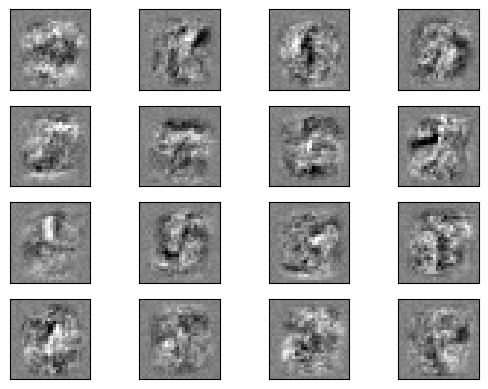

In [ ]:
# ヒートマップを表示する
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 4)

# 全体の最小値と最大値を使って、全ての重みを同じ尺度で比較できるようにする
vmin, vmax = nn.coefs_[0].min(), nn.coefs_[0].max()
for coef, ax in zip(nn.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show();